In [1]:
import os
import seaborn as sns
from utils import *
from plots import *
from constants import *
%load_ext autoreload
%autoreload 2
BASE_DATA_PATH = os.path.join("..", "results")
OUTPUT_FOLDER = os.path.join("..", "out", "figures", "benchmarks")

DATA_SUBSET = os.path.join(BASE_DATA_PATH, "subset")
DATA_KNN_SUBSET = os.path.join(BASE_DATA_PATH, "knn_subset")
DATA_KNN_FULL = os.path.join(BASE_DATA_PATH, "knn_full")
DATA_FULL = os.path.join(BASE_DATA_PATH, "full")
DATA_PARALLEL_SUBSET = os.path.join(BASE_DATA_PATH, "parallel_subset")
DATA_PARALLEL_FULL = os.path.join(BASE_DATA_PATH, "parallel_full")

set_default_style()

Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-06-01-10:38:28.csv


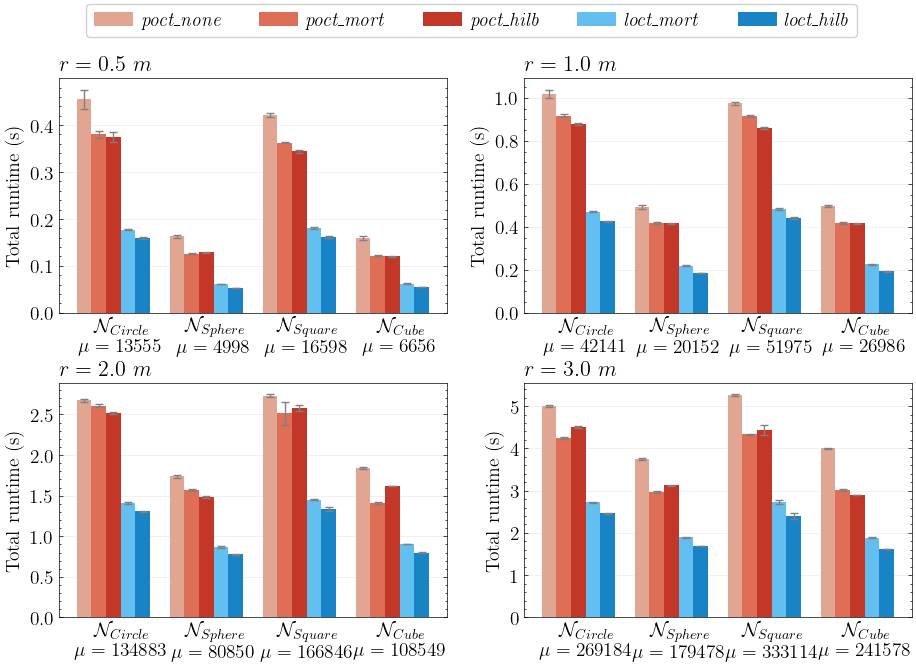

In [2]:
# Paris_Luxembourg_6 SUBSETS
fig = plot_runtime_comparison(DATA_SUBSET, "Paris_Luxembourg_6", OCTREE_ENCODER, cols=2, figsz=(11,7))
output_fig(fig, OUTPUT_FOLDER, "paris_luxembourg_6_random")
display(fig)

Loading results file: ../results/full/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-05-29-02:38:08.csv


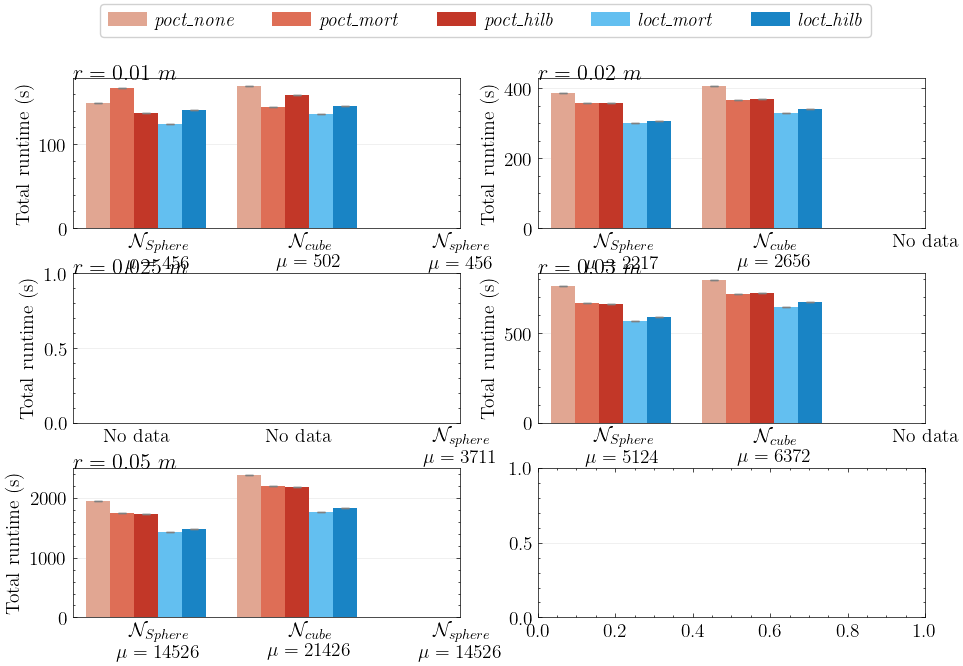

In [3]:
# sg27 FULL
fig = plot_runtime_comparison(DATA_FULL, "sg27_station8_intensity_rgb", OCTREE_ENCODER, cols=2, figsz=(11,7))
output_fig(fig, OUTPUT_FOLDER, "sg27_full")
display(fig)

Loading results file: ../results/subset/Lille_0/Lille_0-2025-06-01-10:30:28.csv
Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-06-01-10:38:28.csv
Loading results file: ../results/subset/5080_54400/5080_54400-2025-06-01-10:37:30.csv
Loading results file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-06-01-10:55:38.csv
Loading results file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-06-01-11:00:41.csv
Loading results file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-06-01-12:43:03.csv


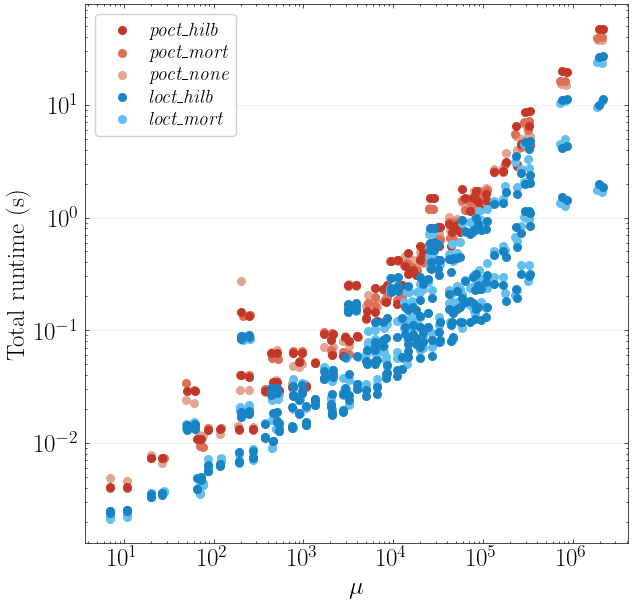

In [4]:
# log-log SUBSETS
fig = plot_result_sizes_runtime_log(DATA_SUBSET, ALL_CLOUDS, OCTREE_ENCODER)
output_fig(fig, OUTPUT_FOLDER, "loglog_random")
display(fig)

Loading results file: ../results/subset/Lille_0/Lille_0-2025-06-01-10:30:28.csv
Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-06-01-10:38:28.csv
Loading results file: ../results/subset/5080_54400/5080_54400-2025-06-01-10:37:30.csv
Loading results file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-06-01-10:55:38.csv
Loading results file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-06-01-11:00:41.csv
Loading results file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-06-01-12:43:03.csv


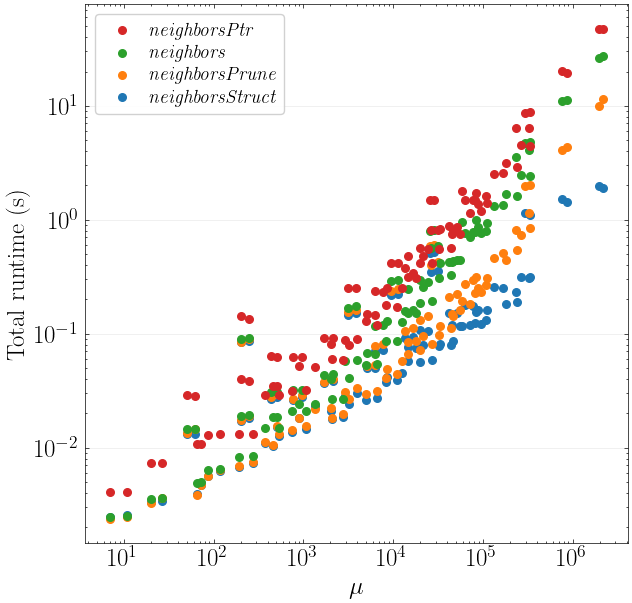

In [5]:
# log-log SUBSETS
fig = plot_result_sizes_runtime_log(DATA_SUBSET, ALL_CLOUDS, OUR_RADIUS, encoder=HILBERT_ENCODER)
output_fig(fig, OUTPUT_FOLDER, "loglog_random_algos")
display(fig)

Loading results file: ../results/subset/Lille_0/Lille_0-2025-06-01-10:30:28.csv
Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-06-01-10:38:28.csv
Loading results file: ../results/subset/5080_54400/5080_54400-2025-06-01-10:37:30.csv
Loading results file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-06-01-10:55:38.csv
Loading results file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-06-01-11:00:41.csv
Loading results file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-06-01-12:43:03.csv


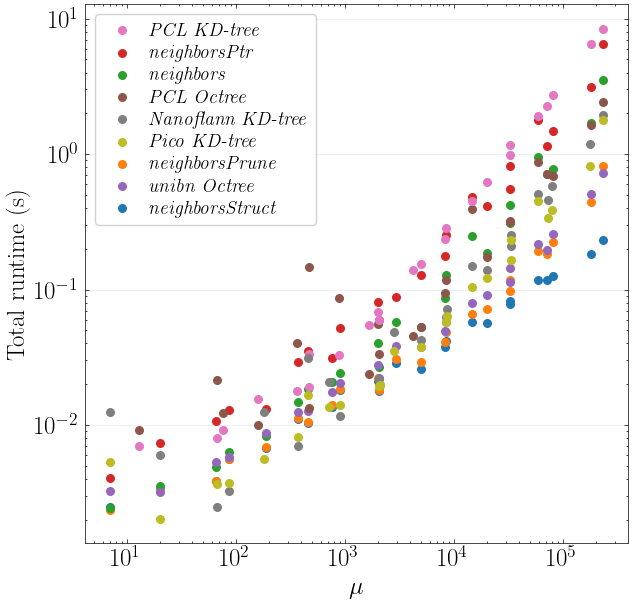

In [6]:
fig = plot_result_sizes_runtime_log(DATA_SUBSET, ALL_CLOUDS, ALL_RADIUS, encoder=HILBERT_ENCODER, kernel="Sphere")
output_fig(fig, OUTPUT_FOLDER, "loglog_random_structures_sphere")
display(fig)

In [7]:
def plot_all_heatmaps(data_path, cloud, save = False):
    source_str = "full" if data_path == DATA_PARALLEL_FULL else "subset"
    algos = [NEIGHBORS_PTR, NEIGHBORS, NEIGHBORS_PRUNE, NEIGHBORS_STRUCT, NEIGHBORS_NANOFLANN, NEIGHBORS_PICO]
    for algo in algos:
        fig = plot_octree_parallelization(data_path, cloud, algo, True)
        print(algo)
        display(fig)
        if save:
            output_fig(fig, OUTPUT_FOLDER, f"parallel/{cloud}_parallel_{source_str}_{algo}")
        plt.close(fig)


Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPtr


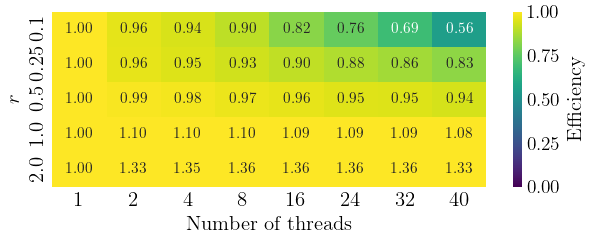

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighbors


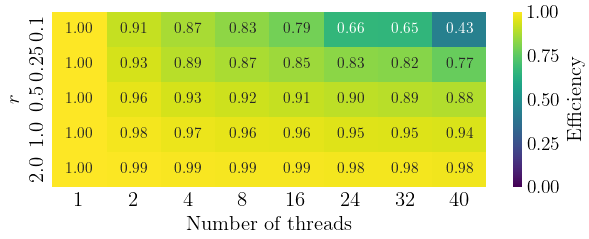

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPrune


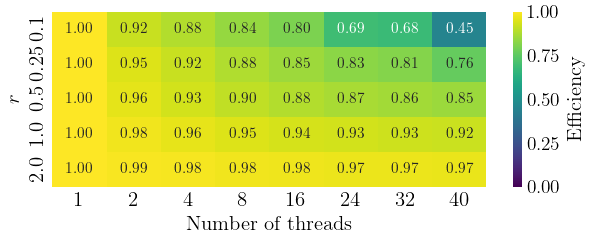

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsStruct


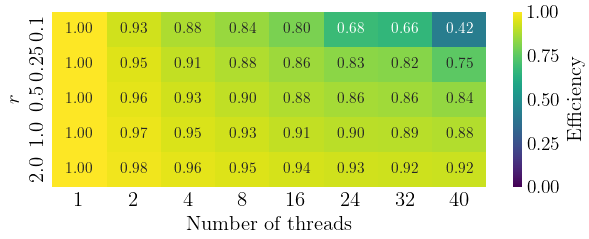

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsNanoflann


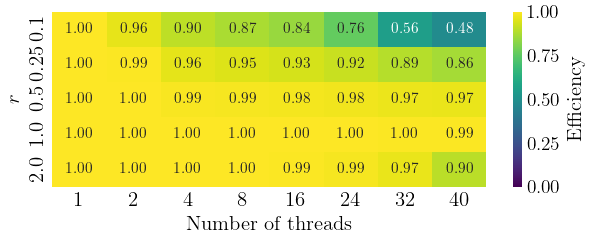

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPico


/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


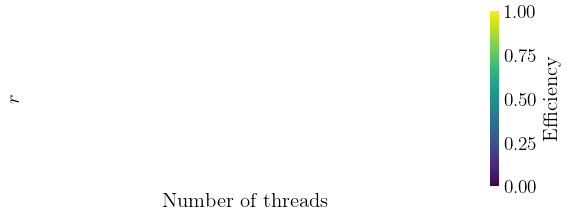

In [8]:
# parallel SUBSETS
plot_all_heatmaps(DATA_PARALLEL_FULL, "Lille_0", True)

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighborsPtr


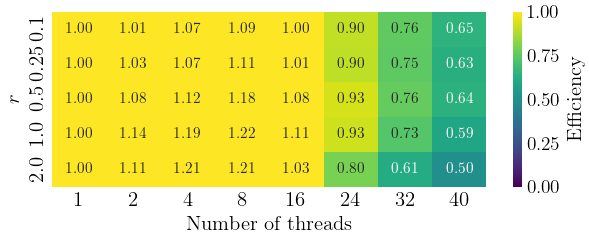

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighbors


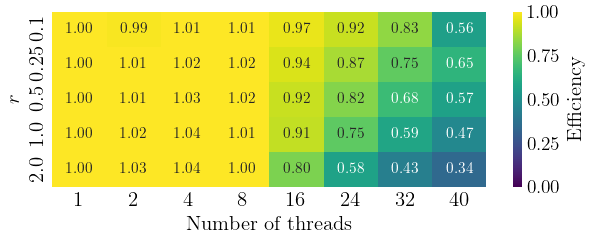

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighborsPrune


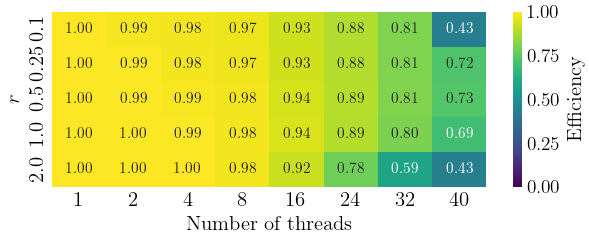

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighborsStruct


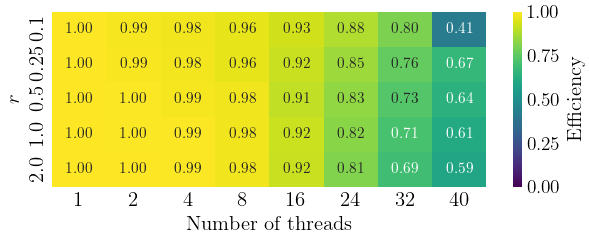

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighborsNanoflann


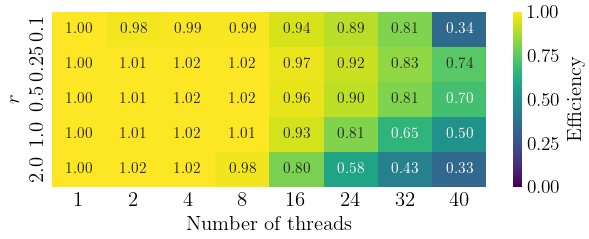

Loading results file: ../results/parallel_subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-18-11:31:08.csv
neighborsPico


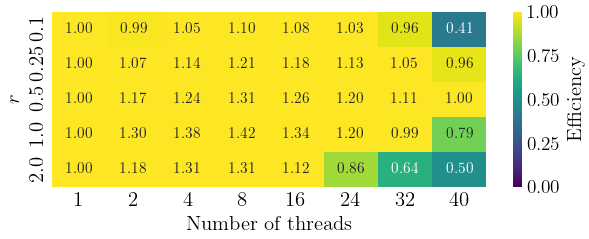

In [9]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "Paris_Luxembourg_6", True)

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighborsPtr


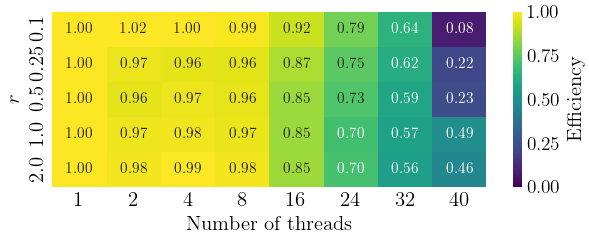

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighbors


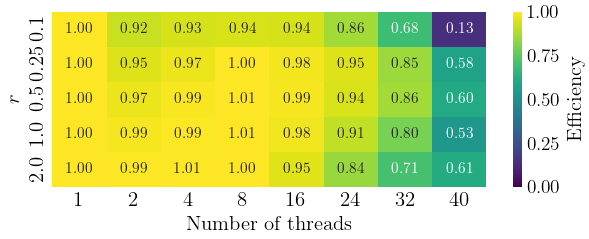

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighborsPrune


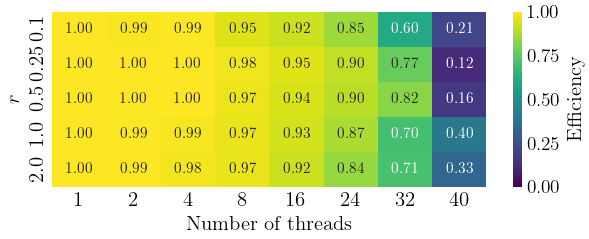

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighborsStruct


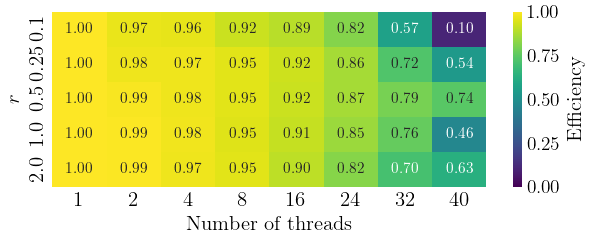

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighborsNanoflann


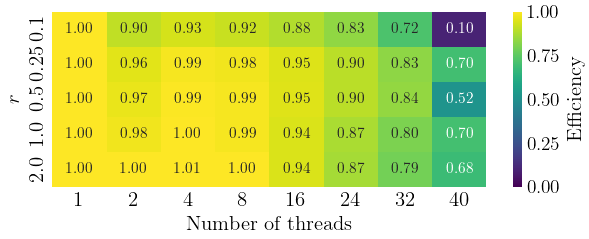

Loading results file: ../results/parallel_subset/5080_54400/5080_54400-2025-11-18-11:30:47.csv
neighborsPico


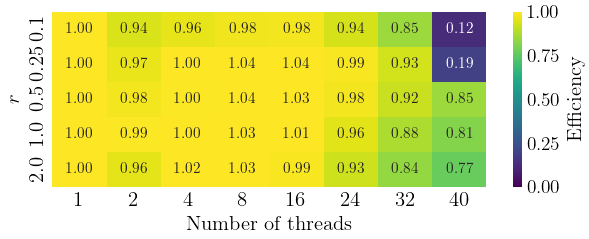

In [10]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "5080_54400", True)

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighborsPtr


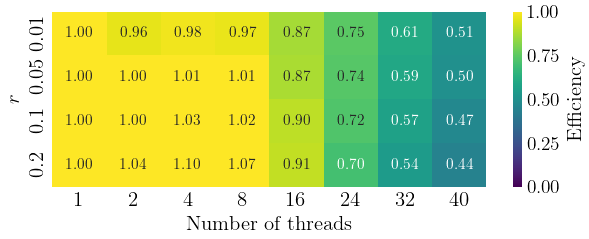

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighbors


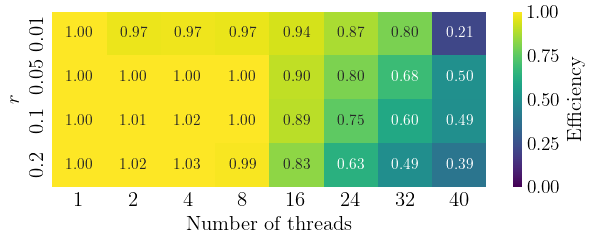

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighborsPrune


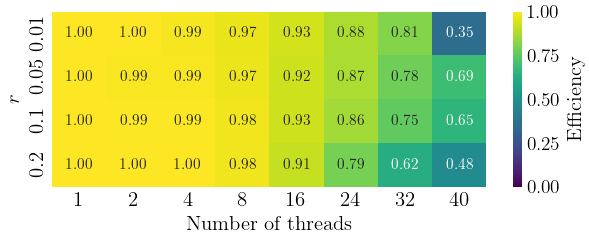

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighborsStruct


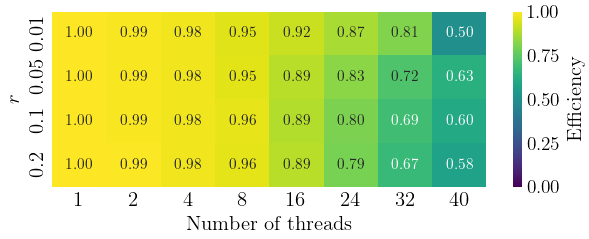

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighborsNanoflann


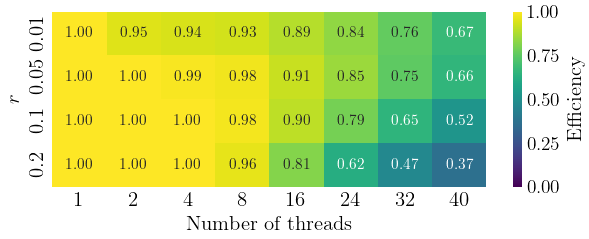

Loading results file: ../results/parallel_subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-11-18-11:37:04.csv
neighborsPico


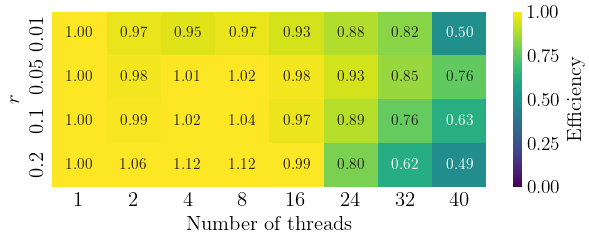

In [11]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "bildstein_station1_xyz_intensity_rgb", True)

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighborsPtr


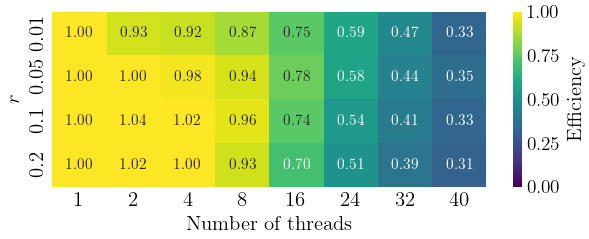

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighbors


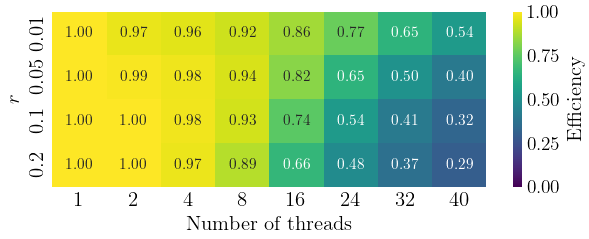

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighborsPrune


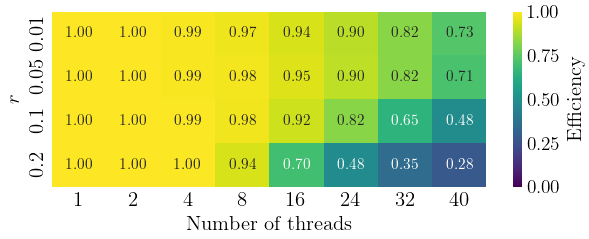

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighborsStruct


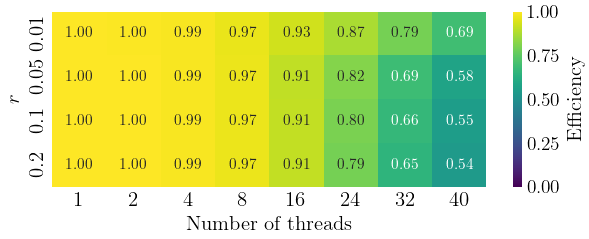

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighborsNanoflann


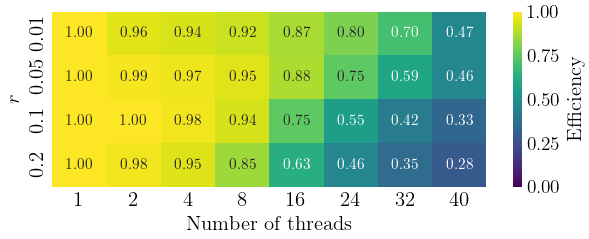

Loading results file: ../results/parallel_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-18-11:40:22.csv
neighborsPico


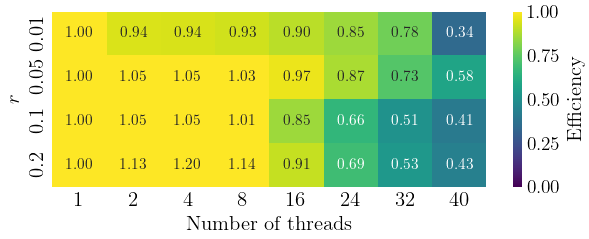

In [12]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "sg27_station8_intensity_rgb", True)

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighborsPtr


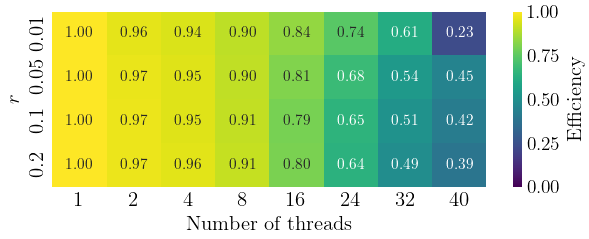

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighbors


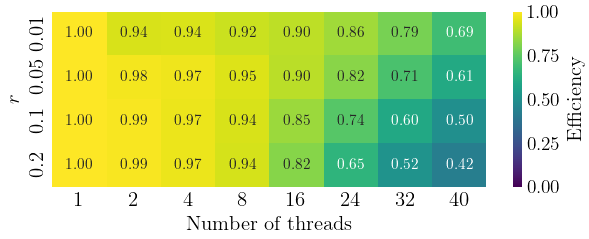

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighborsPrune


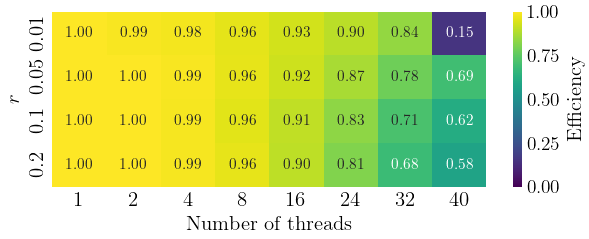

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighborsStruct


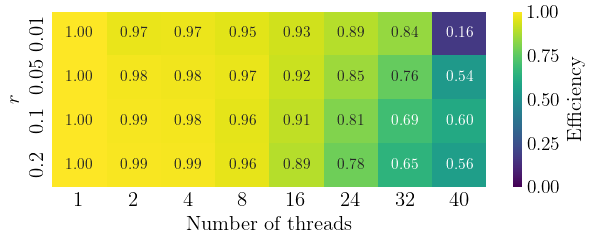

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighborsNanoflann


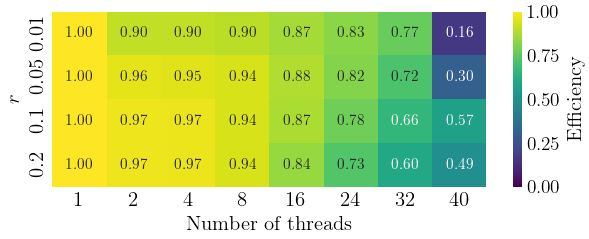

Loading results file: ../results/parallel_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-11-18-12:06:34.csv
neighborsPico


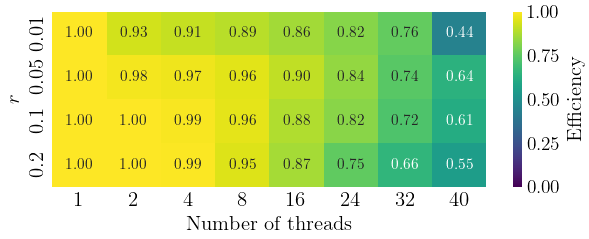

In [13]:
plot_all_heatmaps(DATA_PARALLEL_SUBSET, "Speulderbos_2017_TLS", True)

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPtr


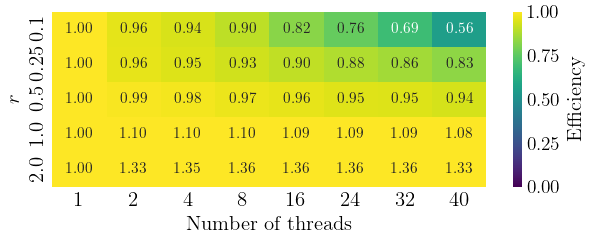

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighbors


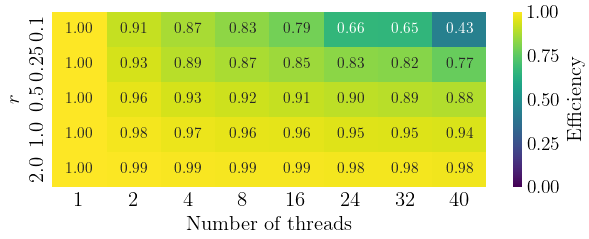

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPrune


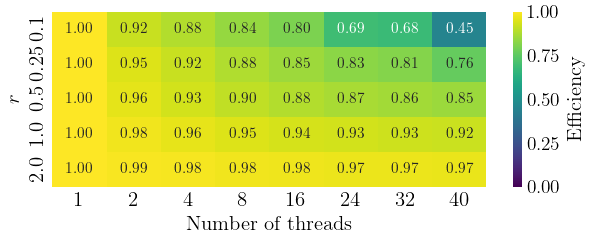

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsStruct


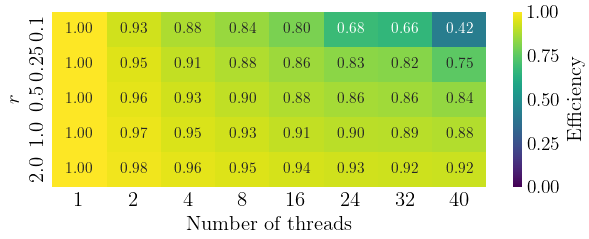

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsNanoflann


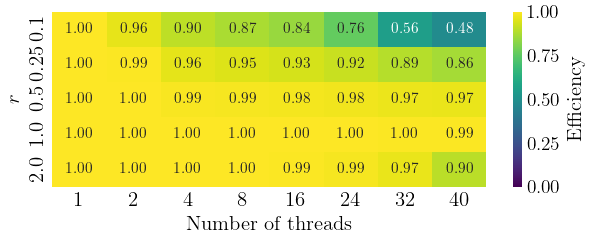

Loading results file: ../results/parallel_full/Lille_0/Lille_0-2025-11-18-12:18:17.csv
neighborsPico


/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


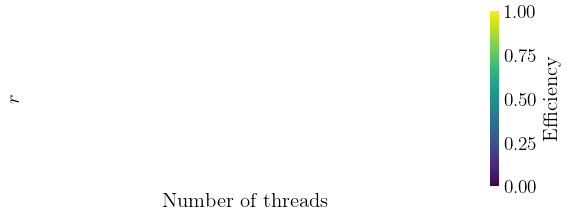

In [14]:
plot_all_heatmaps(DATA_PARALLEL_FULL, "Lille_0", True)

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighborsPtr


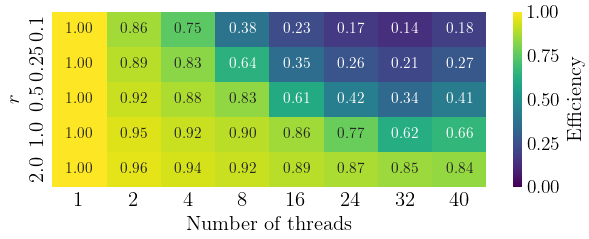

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighbors


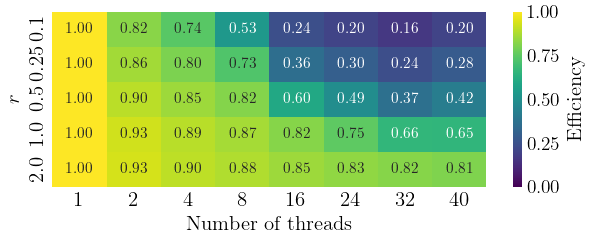

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighborsPrune


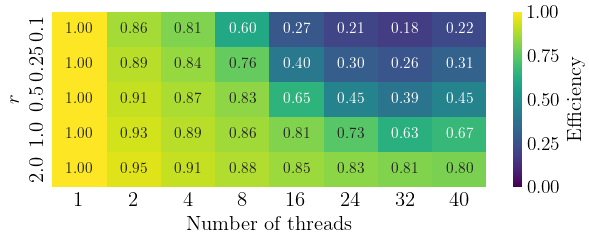

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighborsStruct


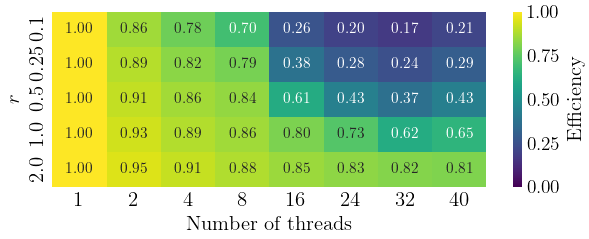

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighborsNanoflann


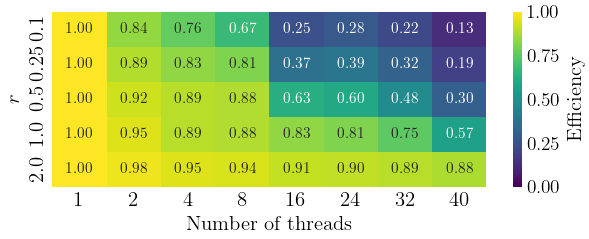

Loading results file: ../results/parallel_full/5080_54400/5080_54400-2025-11-19-09:52:36.csv
neighborsPico


/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/pablo/pablo-diaz/.conda/lib/python3.11/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


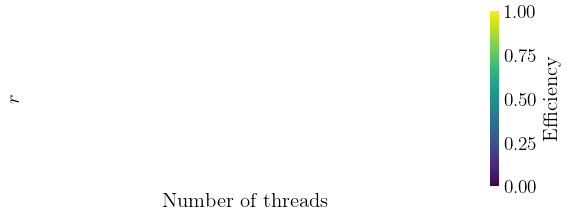

In [15]:
plot_all_heatmaps(DATA_PARALLEL_FULL, "5080_54400", True)

Loading results file: ../results/knn_subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-07-12-13:22:30.csv


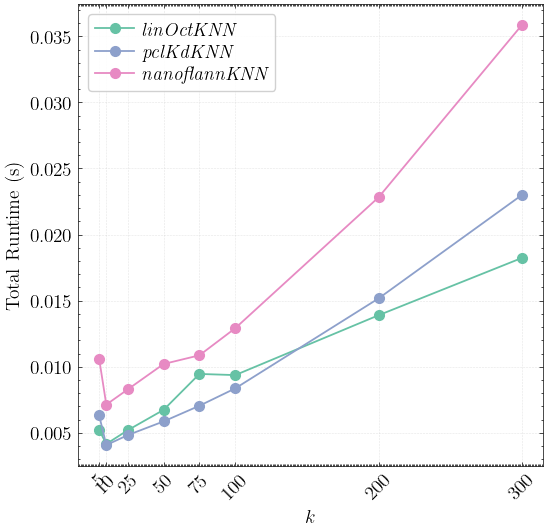

In [37]:

fig = plot_knn_comparison(DATA_KNN_SUBSET, "sg27_station8_intensity_rgb", ALL_KNN, high_limit=300, 
                     struct_whitelist={NANOFLANN_KDTREE, PCL_KDTREE, LINEAR_OCTREE, PICO_KDTREE})
output_fig(fig, OUTPUT_FOLDER, "sg27_knn_random")
display(fig)

Loading results file: ../results/knn_subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-07-12-13:55:04.csv


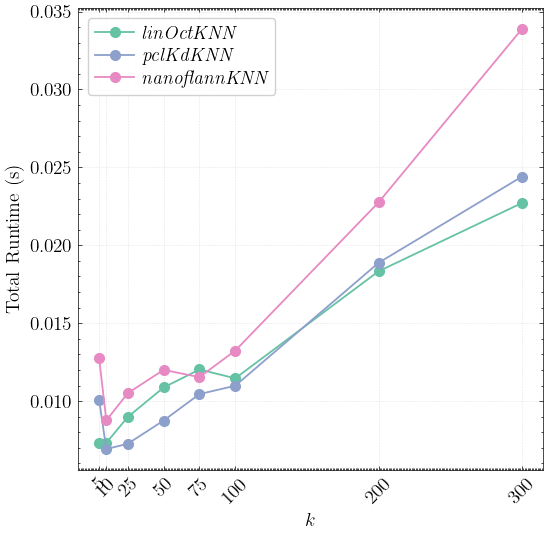

In [38]:
fig = plot_knn_comparison(DATA_KNN_SUBSET, "Speulderbos_2017_TLS", ALL_KNN, high_limit=300, 
                     struct_whitelist={NANOFLANN_KDTREE, PCL_KDTREE, LINEAR_OCTREE, PICO_KDTREE})
output_fig(fig, OUTPUT_FOLDER, "speulderbos_knn_random")
display(fig)

Loading results file: ../results/knn_subset/Lille_0/Lille_0-2025-07-12-13:11:11.csv


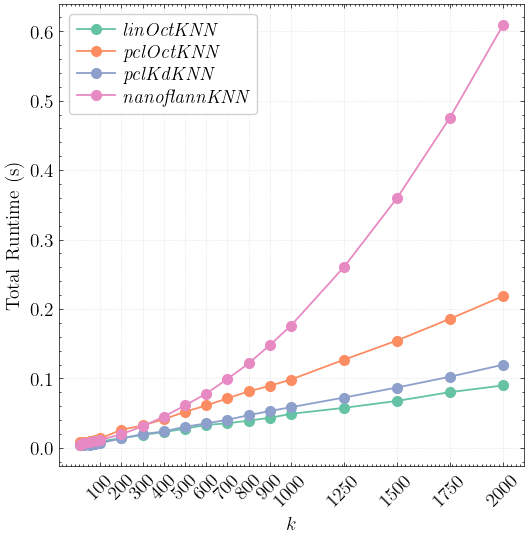

In [39]:
fig = plot_knn_comparison(DATA_KNN_SUBSET, "Lille_0", ALL_KNN, label_low_limit=100)
output_fig(fig, OUTPUT_FOLDER, "lille0_knn_random")
display(fig)

Loading results file: ../results/knn_full/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-11-06-12:08:45.csv


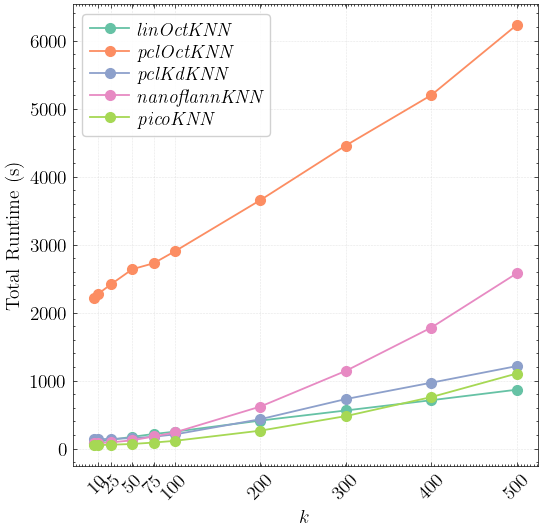

In [40]:
fig = plot_knn_comparison(DATA_KNN_FULL, "sg27_station8_intensity_rgb", ALL_KNN, label_low_limit=10)
output_fig(fig, OUTPUT_FOLDER, "sg27_knn_full")
display(fig)

Loading results file: ../results/knn_full/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-11-05-23:45:05.csv


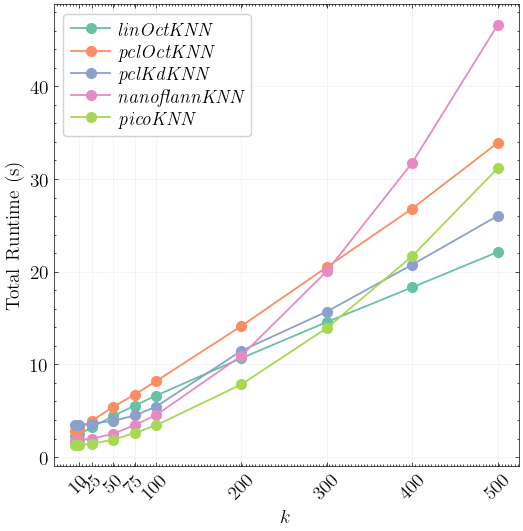

In [41]:
fig = plot_knn_comparison(DATA_KNN_FULL, "Paris_Luxembourg_6", ALL_KNN, label_low_limit=10)
output_fig(fig, OUTPUT_FOLDER, "parislux6_knn_full")
display(fig)

Loading results file: ../results/knn_full/5080_54400/5080_54400-2025-11-07-02:02:39.csv


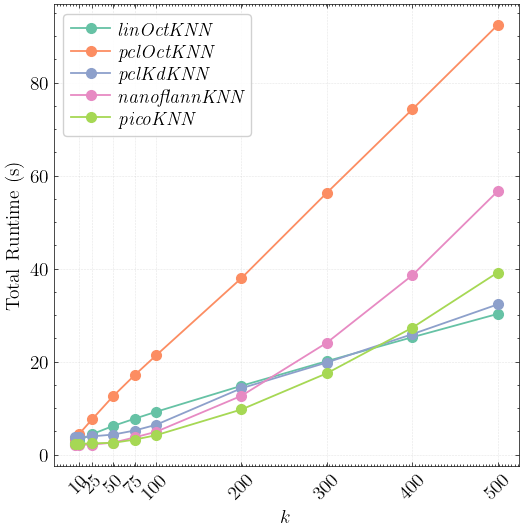

In [42]:
fig = plot_knn_comparison(DATA_KNN_FULL, "5080_54400", ALL_KNN, label_low_limit=10)
output_fig(fig, OUTPUT_FOLDER, "5080_54400_knn_full")
display(fig)

In [43]:
def table_speedup_vs_baseline(data_path, clouds_datasets, kernel, viz_config, encoder="all"):
    
    dfs = read_multiple_datasets(data_path, clouds_datasets)
    all_results = []

    # Define the Baseline Parameters here (based on your previous PCL_OCTREE key)
    # You can change this to PCL_KDTREE if that is the intended baseline.
    baseline_params = {"octree": PCL_OCTREE, "operation": NEIGHBORS_PCLOCT}

    # Define result size bins: [(min, max), ...]
    bins = [(10**i, 10**(i+2)) for i in range(0, 8, 2)]

    for bin_min, bin_max in bins:
        bin_results = []
        
        # 1. Collect Data for all configs in this Bin
        for config in viz_config:
            runtimes = []

            for df_name, df in dfs.items():
                if df.empty: continue
                
                # General Filters
                if kernel != "all":
                    df = df[(df['kernel'] == kernel)]
                
                if encoder != "all":
                    df = df[df["encoder"] == encoder]

                # Specific Config Filter (Using the helper from previous steps)
                struct_data = filter_by_params(df, config["params"])

                if struct_data.empty: continue

                # Bin Filter
                struct_data = struct_data[
                    (struct_data["avg_result_size"] >= bin_min) & 
                    (struct_data["avg_result_size"] < bin_max)
                ]
                
                if struct_data.empty: continue

                runtimes.extend(struct_data["mean"].tolist())

            avg_runtime = np.mean(runtimes) if runtimes else np.nan
            
            bin_results.append({
                "config": config,
                "avg_runtime": avg_runtime
            })

        # 2. Identify Baseline Runtime for this Bin
        # We look for the entry in bin_results where the params match baseline_params
        baseline_runtime = np.nan
        for res in bin_results:
            if res["config"]["params"] == baseline_params:
                baseline_runtime = res["avg_runtime"]
                break

        # 3. Calculate Speedups and Build Rows
        for res in bin_results:
            runtime = res["avg_runtime"]
            config = res["config"]
            
            # Calculate Speedup (Baseline / Current)
            if np.isnan(runtime) or np.isnan(baseline_runtime) or runtime == 0:
                speedup = np.nan
            else:
                speedup = baseline_runtime / runtime

            label = config["display_name"]
            
            # Store raw numbers for sorting, formatted strings for display
            all_results.append({
                "Size Range": f"{bin_min:.0e}–{bin_max:.0e}",
                "Structure": label,
                "_sort_val": speedup if not np.isnan(speedup) else -1.0, # Hidden col for sorting
                "Average Runtime (ms)": f"{runtime:.4f}" if not np.isnan(runtime) else "N/A",
                "Speedup": f"{speedup:.2f}x" if not np.isnan(speedup) else "N/A"
            })

    # Create DataFrame
    df_res = pd.DataFrame(all_results)
    
    if not df_res.empty:
        # Sort using the numeric value to ensure "10.0x" > "2.0x"
        df_res = df_res.sort_values(by=["Size Range", "_sort_val"], ascending=[True, False])
        # Remove the hidden helper column
        df_res = df_res.drop(columns=["_sort_val"])
        
    return df_res

In [44]:
# Hilbert 
table_speedup_vs_baseline(DATA_FULL, ALL_CLOUDS, "Sphere", ALL_RADIUS, encoder=HILBERT_ENCODER)

Loading results file: ../results/full/Lille_0/Lille_0-2025-05-28-22:42:26.csv
Loading results file: ../results/full/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-05-29-01:03:58.csv
Loading results file: ../results/full/5080_54400/5080_54400-2025-05-28-22:12:56.csv
Loading results file: ../results/full/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-05-28-20:49:36.csv
Loading results file: ../results/full/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-05-29-02:38:08.csv
Loading results file: ../results/full/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-05-29-06:57:10.csv


,Size Range,Structure,Average Runtime (ms),Speedup
8,1e+00–1e+02,\textit{Pico KD-tree},3.8362,4.44x
7,1e+00–1e+02,\textit{Nanoflann KD-tree},4.3955,3.87x
3,1e+00–1e+02,\textit{neighborsPtr},5.7053,2.99x
4,1e+00–1e+02,\textit{unibn Octree},5.8831,2.90x
2,1e+00–1e+02,\textit{neighbors},6.1512,2.77x
0,1e+00–1e+02,\textit{neighborsStruct},6.1795,2.76x
6,1e+00–1e+02,\textit{PCL KD-tree},12.7531,1.34x
5,1e+00–1e+02,\textit{PCL Octree},17.0319,1.00x
1,1e+00–1e+02,\textit{neighborsPrune},N/A,N/A
9,1e+02–1e+04,\textit{neighborsStruct},172.6641,2.69x


In [45]:
table_speedup_vs_baseline(DATA_SUBSET, ALL_CLOUDS, "Sphere", ALL_RADIUS, encoder=HILBERT_ENCODER)

Loading results file: ../results/subset/Lille_0/Lille_0-2025-06-01-10:30:28.csv
Loading results file: ../results/subset/Paris_Luxembourg_6/Paris_Luxembourg_6-2025-06-01-10:38:28.csv
Loading results file: ../results/subset/5080_54400/5080_54400-2025-06-01-10:37:30.csv
Loading results file: ../results/subset/bildstein_station1_xyz_intensity_rgb/bildstein_station1_xyz_intensity_rgb-2025-06-01-10:55:38.csv
Loading results file: ../results/subset/sg27_station8_intensity_rgb/sg27_station8_intensity_rgb-2025-06-01-11:00:41.csv
Loading results file: ../results/subset/Speulderbos_2017_TLS/Speulderbos_2017_TLS-2025-06-01-12:43:03.csv


,Size Range,Structure,Average Runtime (ms),Speedup
8,1e+00–1e+02,\textit{Pico KD-tree},0.0037,3.86x
1,1e+00–1e+02,\textit{neighborsPrune},0.0038,3.78x
0,1e+00–1e+02,\textit{neighborsStruct},0.0038,3.74x
2,1e+00–1e+02,\textit{neighbors},0.0043,3.32x
4,1e+00–1e+02,\textit{unibn Octree},0.0044,3.24x
7,1e+00–1e+02,\textit{Nanoflann KD-tree},0.0061,2.35x
6,1e+00–1e+02,\textit{PCL KD-tree},0.0081,1.76x
3,1e+00–1e+02,\textit{neighborsPtr},0.0088,1.63x
5,1e+00–1e+02,\textit{PCL Octree},0.0143,1.00x
9,1e+02–1e+04,\textit{neighborsStruct},0.0212,2.83x
